<center><img src="https://news.illinois.edu/files/6367/543635/116641.jpg" alt="University of Illinois" width="250"/></center>

# STAT542_Statistical Learning: HW2

## due 2023-02-24 ##

* Yu-Ching Liao <ycliao3@illinois.edu>

# Problem 1

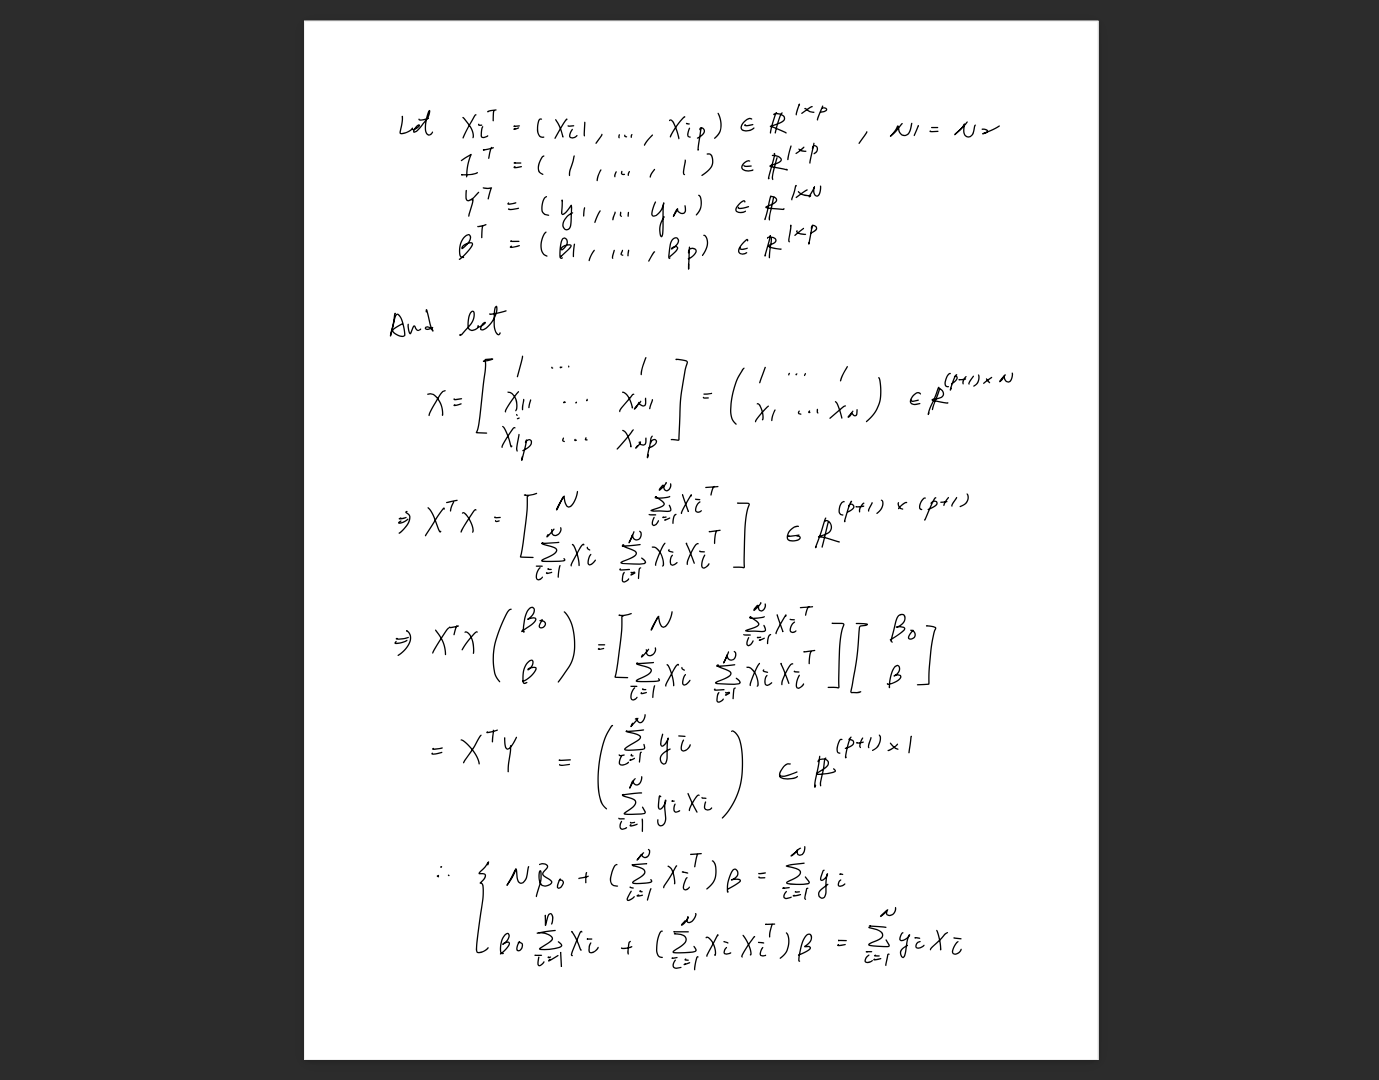

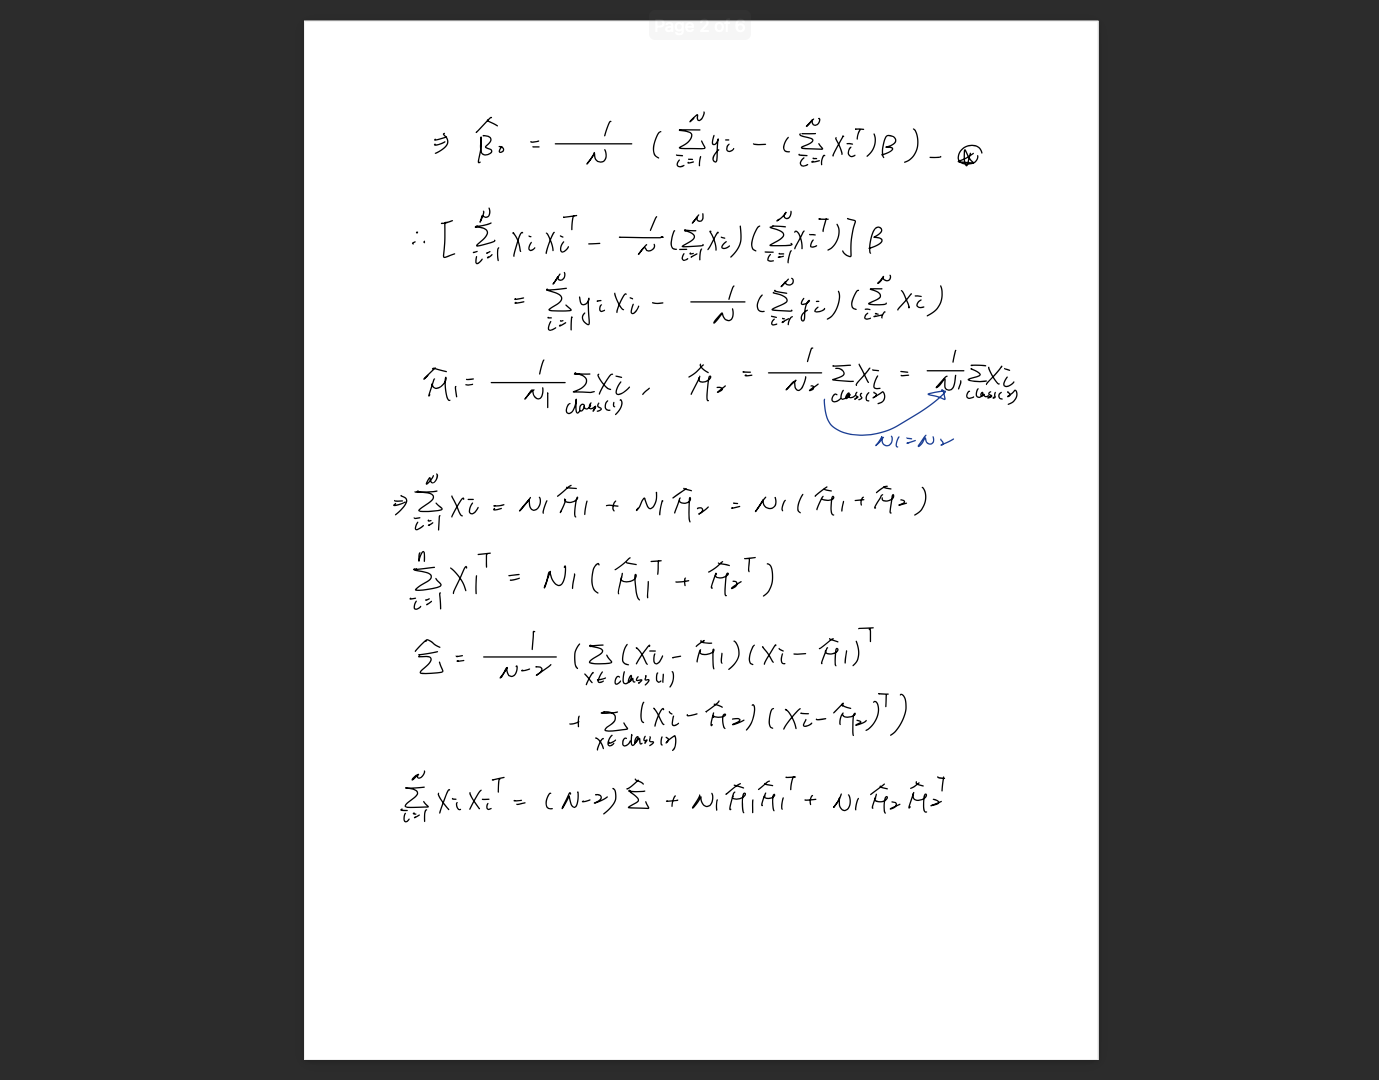

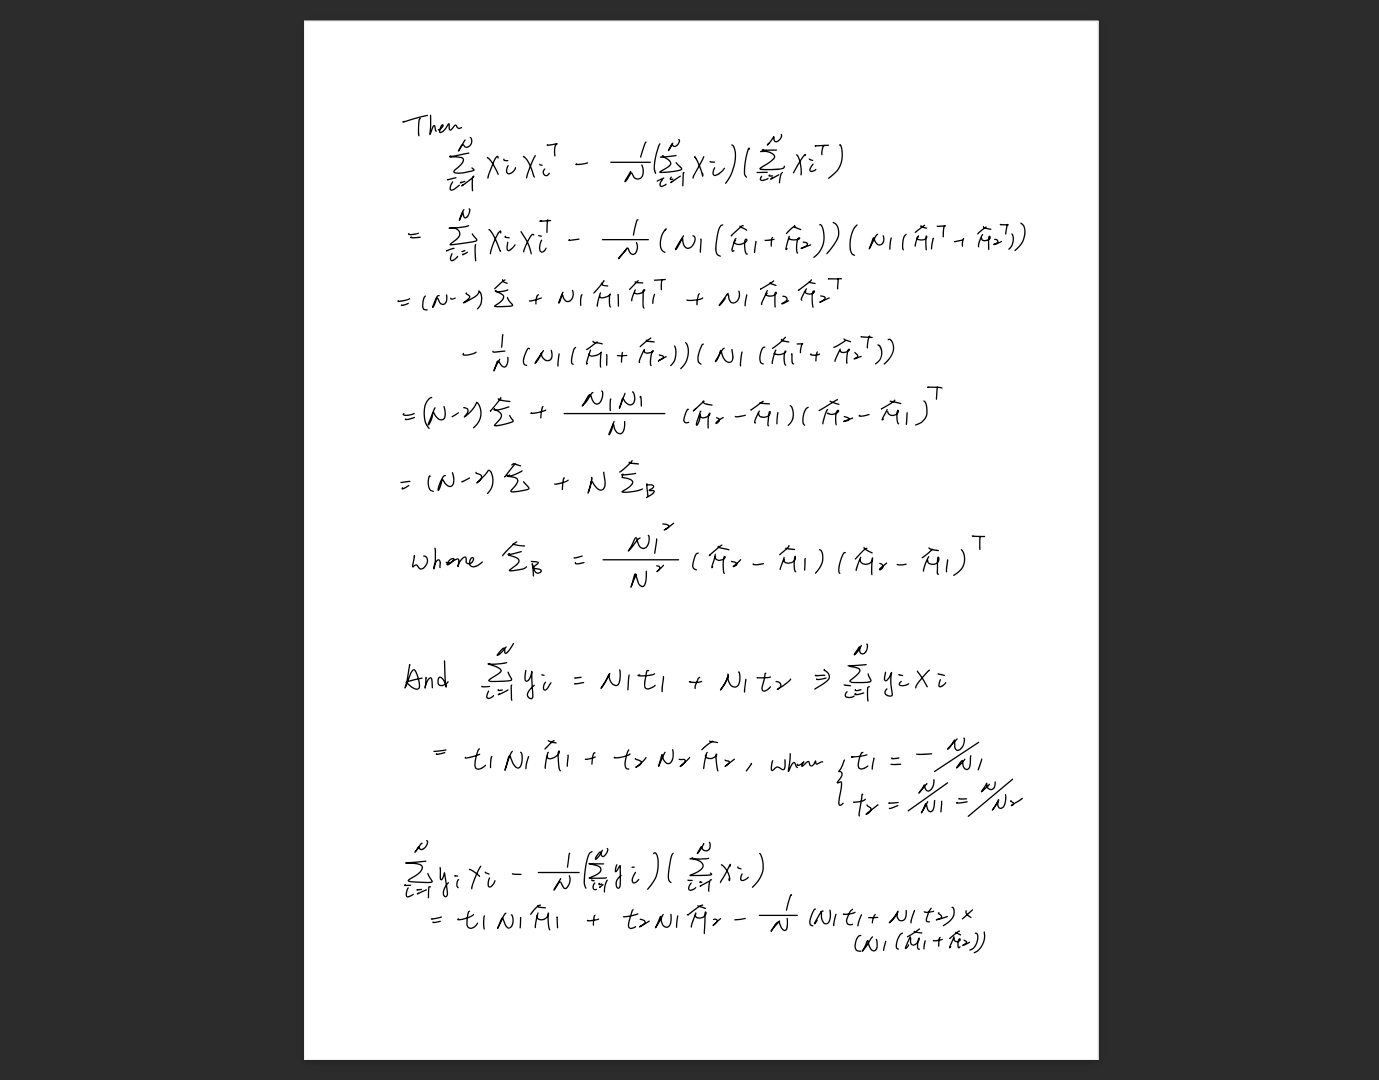

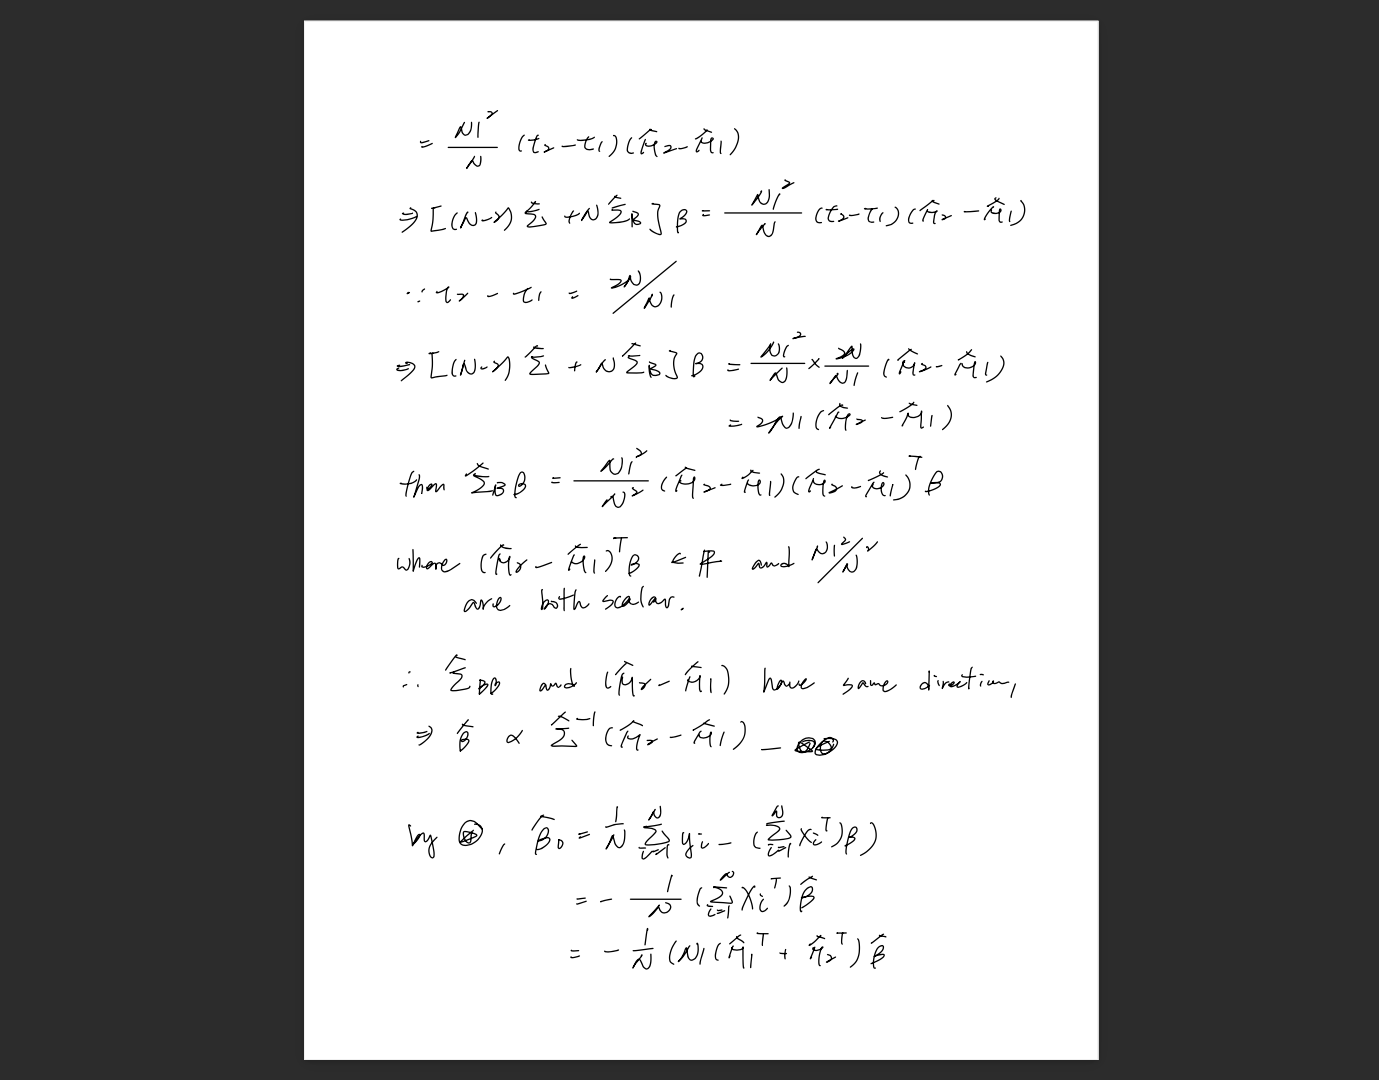

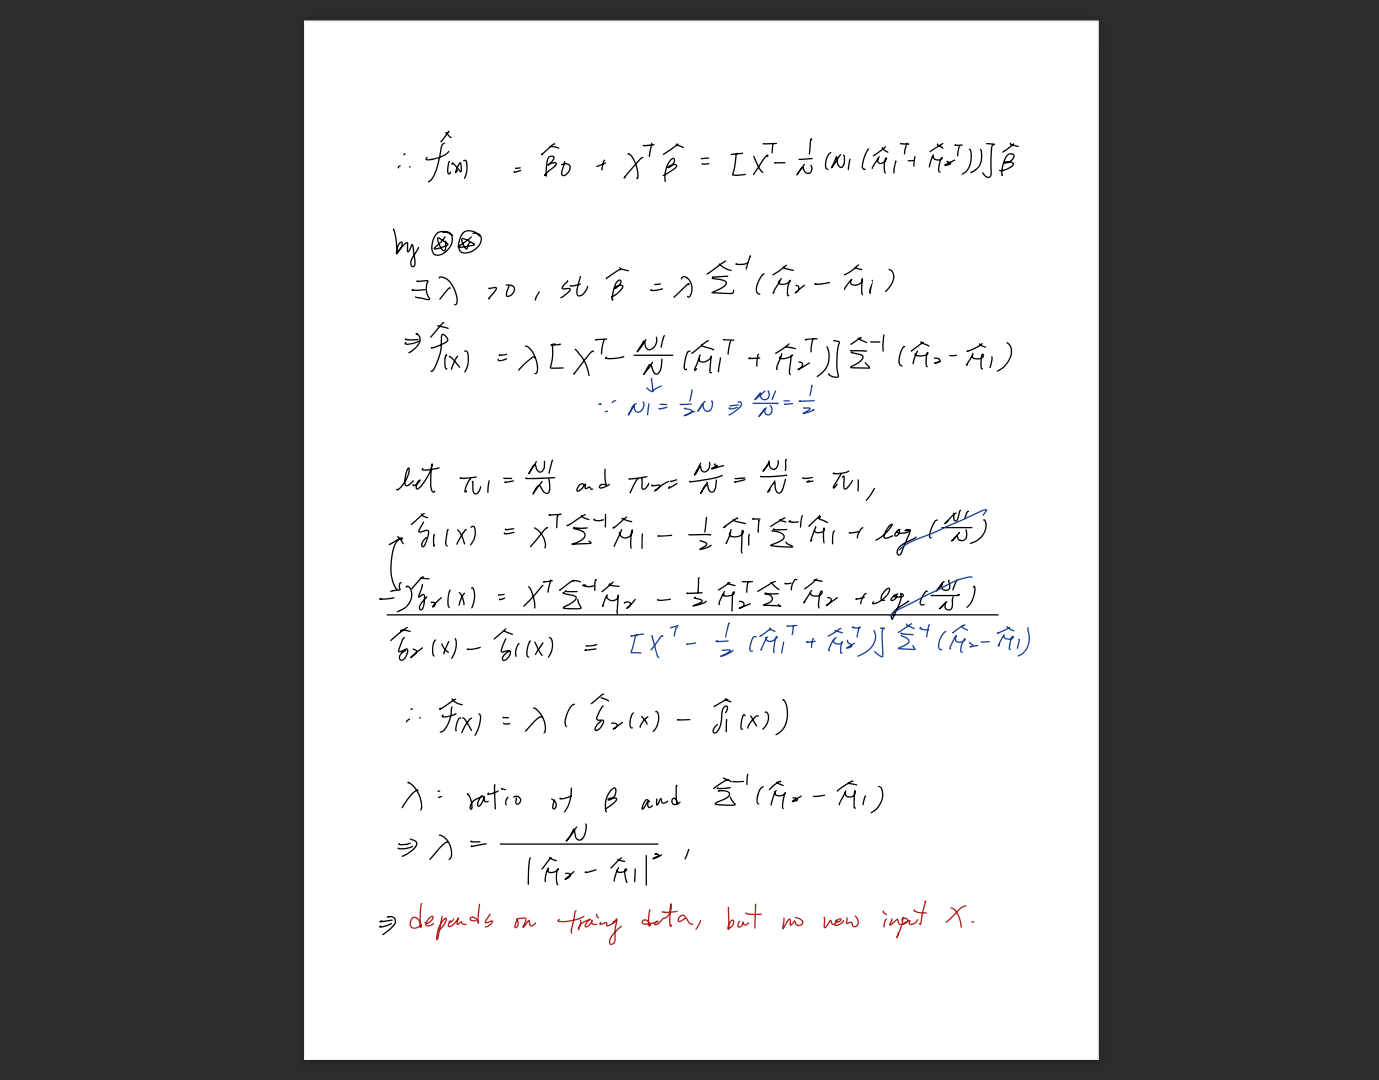

# Problem 2

## Basic Import

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import load_iris
from sklearn import preprocessing
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [4]:
def get_sensitivity_and_specificity(cm, i):
    TP = cm[i, i]
    FN = sum(cm[i])-TP
    FP = sum(cm[:,i])-TP
    TN = sum(sum(cm)) - TP - FN - FP
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    return sensitivity, specificity

TP: The actual value and predicted value should be the same. So concerning Setosa class, the value of cell 1 is the TP value.

FN: The sum of values of corresponding rows except the TP value

FP : The sum of values of corresponding column except the TP value.

TN: The sum of values of all columns and row except the values of that class that we are calculating the values for.

Sensitivity = TP/(TP+FN)

Specificity = TN/(TN+FP)

## Loading Data

In [5]:
iris = load_iris()
X_iris, y_iris = iris.data, iris.target

print(X_iris.shape, y_iris.shape)
print(X_iris[0], y_iris[0])

(150, 4) (150,)
[5.1 3.5 1.4 0.2] 0


## Spliting Training and Testing Sets (5:5)

In [6]:
X, y = X_iris[:, :4], y_iris

#Split the dataset into 50/50
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5) 
print(X_train.shape, y_train.shape)

(75, 4) (75,)


In [7]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## LDA

Coefficients: 
 [[  5.19810424   4.14806024 -30.91329638 -10.60888689]
 [ -2.22542329  -1.53103875  10.09760661   1.99195012]
 [ -3.31313033  -2.89889989  22.97106419   9.41801276]] 

Intercepts: 
 [-26.33048356  -3.33825663 -17.03547328] 

Training Set Accuracy: 0.9733333333333334
Testing Set Accuracy: 0.9733333333333334 

Confusion Matrix:


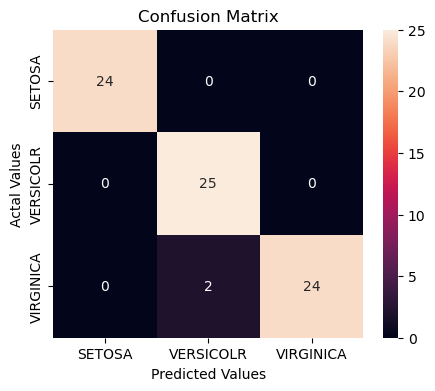

,Classes,Sensitivities,Specificities
0,setosa,1.000000,1.00
1,versicolor,1.000000,0.96
2,virginica,0.923077,1.00



 Additional Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        24
  versicolor       0.93      1.00      0.96        25
   virginica       1.00      0.92      0.96        26

    accuracy                           0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75



In [8]:
clf = LDA()
clf.fit(X_train, y_train)

print("Coefficients: \n", clf.coef_, '\n')
print("Intercepts: \n", clf.intercept_, '\n')

#Get the training accuracy
y_train_pred = clf.predict(X_train)
print("Training Set Accuracy:", metrics.accuracy_score(y_train, y_train_pred))

#Get the testing accuracy
y_pred = clf.predict(X_test)
print("Testing Set Accuracy:", metrics.accuracy_score(y_test, y_pred), '\n')

#Get the Confusion Matrix and print it out
print("Confusion Matrix:")
cm = metrics.confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['SETOSA','VERSICOLR','VIRGINICA'], 
                     columns = ['SETOSA','VERSICOLR','VIRGINICA'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


#Get the Sensitivity and Specificity
res = []
name = ['setosa', 'versicolor', 'virginica']
for l in [0, 1, 2]:
    res.append([name[l],get_sensitivity_and_specificity(cm,l)[0],get_sensitivity_and_specificity(cm,l)[1]])
    
display(pd.DataFrame(res, columns=['Classes', 'Sensitivities', 'Specificities']))

#Provide futher information
print('\n',"Additional Report:")
print(
    metrics.classification_report(y_test,
                                  y_pred,
                                  target_names=iris.target_names))

# Problem 3

## Logistic Regression

Coefficients: 
 [[-0.93544398  0.88908932 -1.59623114 -1.46328773]
 [ 0.02401118 -0.32803795 -0.12958432 -0.31026215]
 [ 0.9114328  -0.56105137  1.72581546  1.77354988]] 

Intercepts: 
 [-0.15101571  1.63089414 -1.47987843] 

Training Set Accuracy: 0.96
Testing Set Accuracy: 0.9466666666666667 

Confusion Matrix:


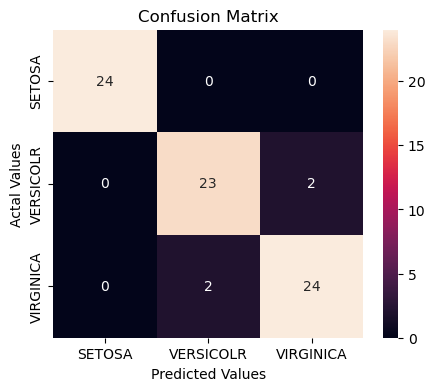

,Classes,Sensitivities,Specificities
0,setosa,1.000000,1.000000
1,versicolor,0.920000,0.960000
2,virginica,0.923077,0.959184



 Additional Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        24
  versicolor       0.92      0.92      0.92        25
   virginica       0.92      0.92      0.92        26

    accuracy                           0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75



In [9]:
clf2 = LogisticRegression()
clf2.fit(X_train, y_train)

print("Coefficients: \n", clf2.coef_, '\n')
print("Intercepts: \n", clf2.intercept_, '\n')

y_train_pred = clf2.predict(X_train)
print("Training Set Accuracy:", metrics.accuracy_score(y_train, y_train_pred))

y_pred = clf2.predict(X_test)
print("Testing Set Accuracy:", metrics.accuracy_score(y_test, y_pred), '\n')

print("Confusion Matrix:")
cm = metrics.confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['SETOSA','VERSICOLR','VIRGINICA'], 
                     columns = ['SETOSA','VERSICOLR','VIRGINICA'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

res = []
name = ['setosa', 'versicolor', 'virginica']

for l in [0, 1, 2]:
    res.append([name[l],get_sensitivity_and_specificity(cm,l)[0],get_sensitivity_and_specificity(cm,l)[1]])
    
display(pd.DataFrame(res, columns=['Classes', 'Sensitivities', 'Specificities']))

print('\n',"Additional Report:")
print(
    metrics.classification_report(y_test,
                                  y_pred,
                                  target_names=iris.target_names))

### Comparison

From the confusion matrix and other outcome, I would say LDA works slightly better than Logistic Regression. 

## Logistic Regression without Intercept 

Coefficients: 
 [[-0.43957791  0.89408811 -1.2256458  -1.01900237]
 [-0.22899276 -0.92764537  0.63139514 -0.01916991]
 [ 0.66857067  0.03355726  0.59425066  1.03817228]] 

Intercepts: 
 [0. 0. 0.] 

Training Set Accuracy: 0.8533333333333334
Testing Set Accuracy: 0.8133333333333334 

Confusion Matrix:


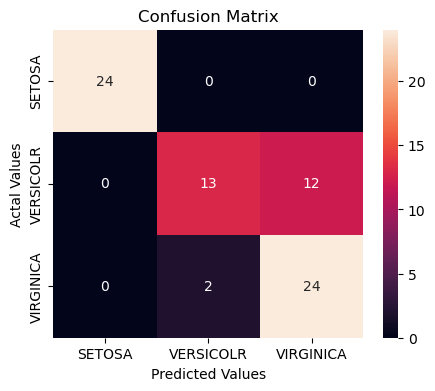

,Classes,Sensitivities,Specificities
0,setosa,1.000000,1.000000
1,versicolor,0.520000,0.960000
2,virginica,0.923077,0.755102



 Additional Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        24
  versicolor       0.87      0.52      0.65        25
   virginica       0.67      0.92      0.77        26

    accuracy                           0.81        75
   macro avg       0.84      0.81      0.81        75
weighted avg       0.84      0.81      0.81        75



In [10]:
clf3 = LogisticRegression(fit_intercept=False)
clf3.fit(X_train, y_train)

print("Coefficients: \n", clf3.coef_, '\n')
print("Intercepts: \n", clf3.intercept_, '\n')
    
y_train_pred = clf3.predict(X_train)
print("Training Set Accuracy:", metrics.accuracy_score(y_train, y_train_pred) )
y_pred = clf3.predict(X_test)
print("Testing Set Accuracy:", metrics.accuracy_score(y_test, y_pred) ,'\n')

print("Confusion Matrix:")
cm = metrics.confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['SETOSA','VERSICOLR','VIRGINICA'], 
                     columns = ['SETOSA','VERSICOLR','VIRGINICA'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

res = []
name = ['setosa', 'versicolor', 'virginica']

for l in [0, 1, 2]:
    res.append([name[l],get_sensitivity_and_specificity(cm,l)[0],get_sensitivity_and_specificity(cm,l)[1]])
    
display(pd.DataFrame(res, columns=['Classes', 'Sensitivities', 'Specificities']))

print('\n',"Additional Report:")
print(
    metrics.classification_report(y_test,
                                  y_pred,
                                  target_names=iris.target_names))

### Comparison

Without the intercept, there is a significant difference on the accuracy. We can see the performance of sensitivity and specificity is even lower than the outcome with the intercept in general. 

# Problem 4

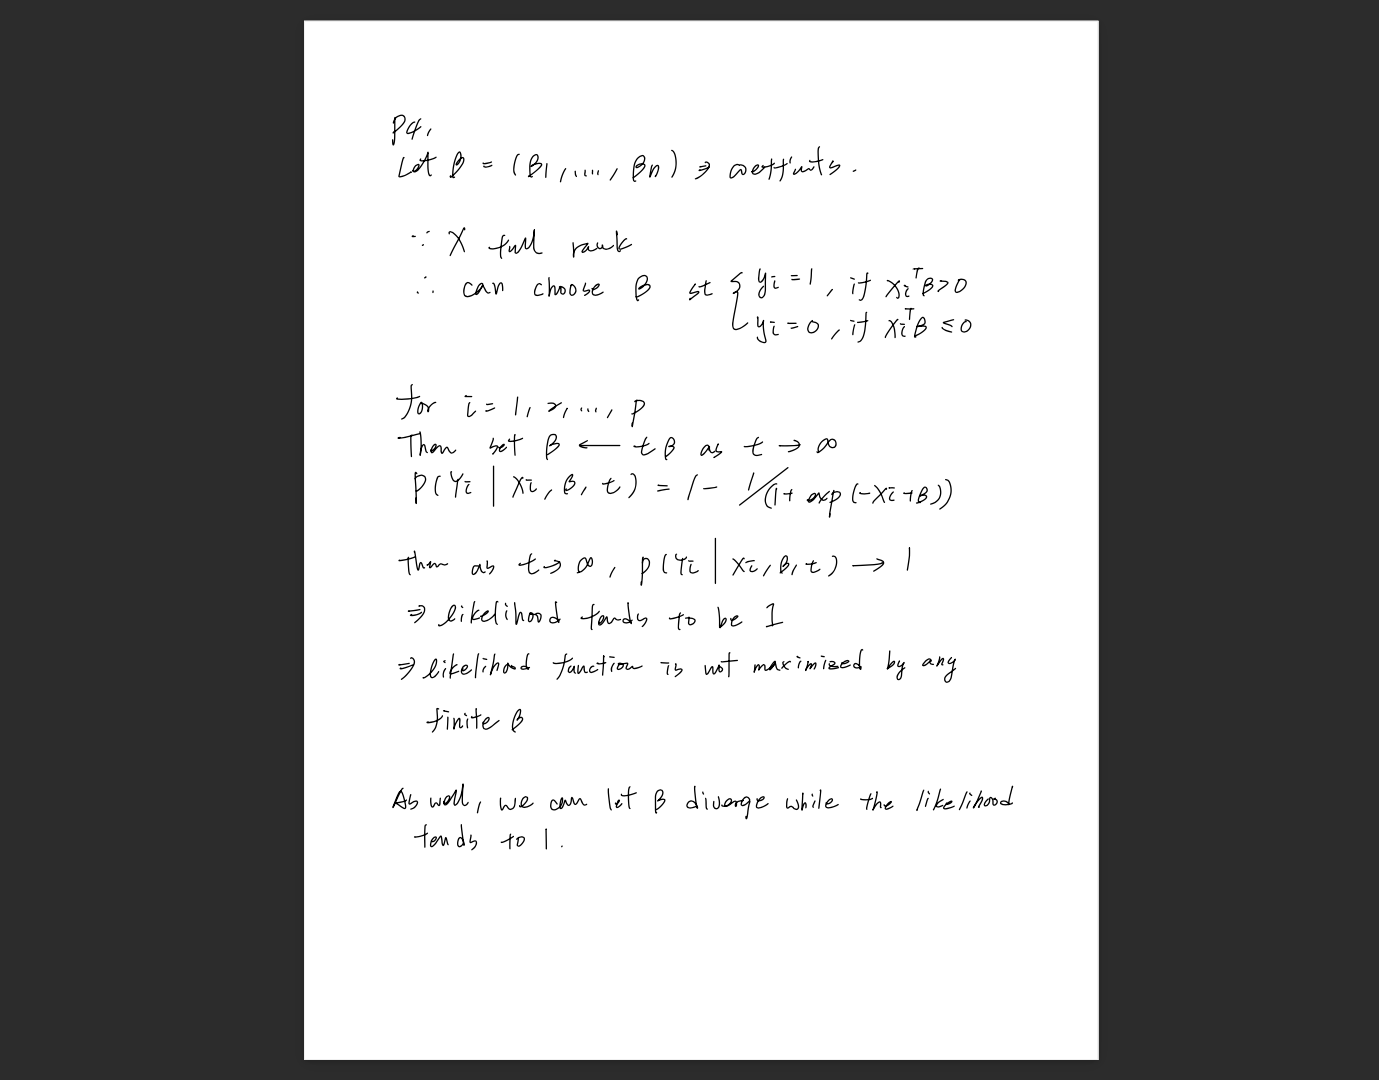

<center><img src="https://news.illinois.edu/files/6367/543635/116641.jpg" alt="University of Illinois" width="250"/></center>